In [1]:
import os
import joblib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip show scikit-learn numpy joblib

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.11/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bayesian-optimization, Boruta, category_encoders, cesium, eli5, fastai, hdbscan, hep_ml, imbalanced-learn, librosa, lime, mlxtend, nilearn, pyLDAvis, pynndescent, rgf-python, scikit-learn-intelex, scikit-optimize, scikit-plot, sentence-transformers, shap, sklearn-compat, sklearn-pandas, TPOT, tsfresh, umap-learn, woodwork, yellowbrick
---
Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: mkl, mkl-service, mkl_fft, mkl_random, mkl_umath, tbb4py
Required-by: accelerate, albucore, albumentations, ale-py, arv

In [3]:
#Đọc dữ liệu
data_path = '/kaggle/input/ie403-doan/tiktok_comments_balanced_v2.csv'
df = pd.read_csv(data_path, usecols=['emotion_label', 'text']).dropna()
df['emotion_label'] = df['emotion_label'].astype(int)
df['text'] = df['text'].astype(str)

In [4]:
# Dự đoán mẫu
label_names = {
    0: 'Vui vẻ',
    1: 'Tức giận',
    2: 'Buồn bã',
    3: 'Sợ hãi',
    4: 'Khác'
}

In [5]:
# Vector hóa văn bản
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['text'])
y = df['emotion_label']

# Chia train/val
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)


In [6]:
# Khởi tạo các mô hình
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
svm = SVC(kernel='linear', probability=True, class_weight='balanced')
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Stacking (kết hợp các mô hình)
stacking_model = StackingClassifier(
    estimators=[
        ('lr', lr),
        ('svm', svm),
        ('rf', rf)
    ],
    final_estimator=LogisticRegression(),
    cv=5
)

models = {
    'Logistic Regression': lr,
    'SVM': svm,
    'Random Forest': rf,
    'Stacking (LR + SVM + RF)': stacking_model
}

In [7]:
# ----- Tạo thư mục lưu mô hình -----
save_dir = "/kaggle/working/saved_models"
os.makedirs(save_dir, exist_ok=True)


🔹 Training model: Logistic Regression

📊 Classification Report for Logistic Regression:
              precision    recall  f1-score   support

      Vui vẻ     0.6107    0.5399    0.5731       276
    Tức giận     0.6117    0.6073    0.6095       275
     Buồn bã     0.6516    0.5761    0.6115       276
      Sợ hãi     0.8056    0.7355    0.7689       276
        Khác     0.5288    0.7018    0.6031       275

    accuracy                         0.6321      1378
   macro avg     0.6417    0.6321    0.6332      1378
weighted avg     0.6418    0.6321    0.6333      1378



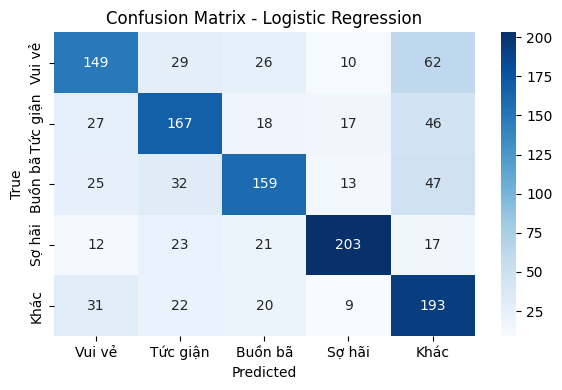


🔹 Training model: SVM

📊 Classification Report for SVM:
              precision    recall  f1-score   support

      Vui vẻ     0.6061    0.5797    0.5926       276
    Tức giận     0.5821    0.5673    0.5746       275
     Buồn bã     0.6502    0.5725    0.6089       276
      Sợ hãi     0.7903    0.7101    0.7481       276
        Khác     0.5239    0.6764    0.5905       275

    accuracy                         0.6212      1378
   macro avg     0.6305    0.6212    0.6229      1378
weighted avg     0.6306    0.6212    0.6230      1378



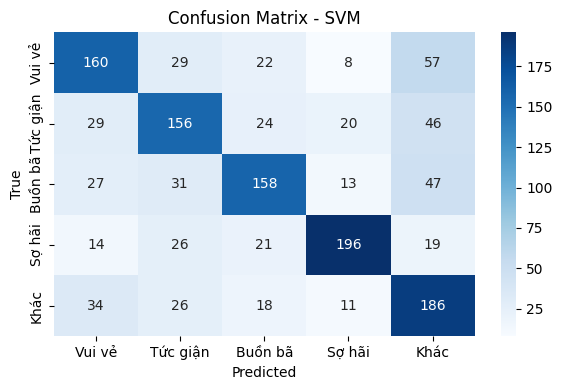


🔹 Training model: Random Forest

📊 Classification Report for Random Forest:
              precision    recall  f1-score   support

      Vui vẻ     0.5991    0.4819    0.5341       276
    Tức giận     0.5382    0.6655    0.5951       275
     Buồn bã     0.6490    0.5761    0.6104       276
      Sợ hãi     0.7895    0.7065    0.7457       276
        Khác     0.5494    0.6473    0.5943       275

    accuracy                         0.6154      1378
   macro avg     0.6250    0.6154    0.6159      1378
weighted avg     0.6252    0.6154    0.6160      1378



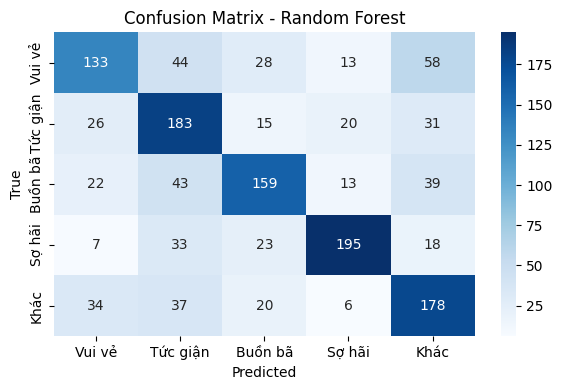


🔹 Training model: Stacking (LR + SVM + RF)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



📊 Classification Report for Stacking (LR + SVM + RF):
              precision    recall  f1-score   support

      Vui vẻ     0.6414    0.5507    0.5926       276
    Tức giận     0.5928    0.6618    0.6254       275
     Buồn bã     0.6748    0.6014    0.6360       276
      Sợ hãi     0.7915    0.7428    0.7664       276
        Khác     0.5653    0.6764    0.6159       275

    accuracy                         0.6466      1378
   macro avg     0.6532    0.6466    0.6473      1378
weighted avg     0.6533    0.6466    0.6473      1378



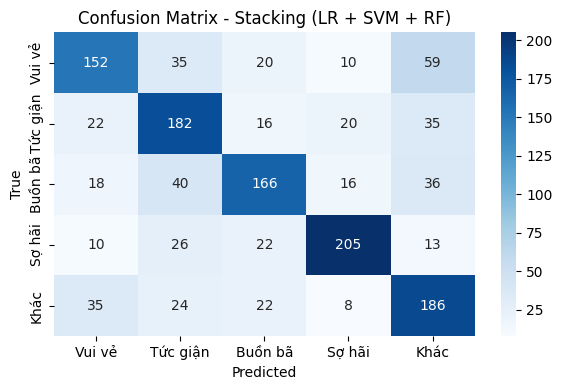

In [8]:
# ----- Huấn luyện & Lưu mô hình -----
for name, model in models.items():
    print(f"\n🔹 Training model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    print(f"\n📊 Classification Report for {name}:")
    print(classification_report(y_val, y_pred, target_names=list(label_names.values()), digits=4))

    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_names.values(),
                yticklabels=label_names.values())
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

    # Lưu mô hình
    joblib.dump(model, os.path.join(save_dir, f"{name}.pkl"))

In [9]:
# ----- Lưu vectorizer -----
joblib.dump(vectorizer, os.path.join(save_dir, "tfidf_vectorizer.pkl"))

['/kaggle/working/saved_models/tfidf_vectorizer.pkl']

In [10]:
# ----- Hàm dự đoán -----
def predict_emotion(text, model, vectorizer):
    vec = vectorizer.transform([text])
    pred = model.predict(vec)[0]
    return label_names[pred]

In [11]:
# Dự đoán thử nghiệm với model stacking
test_texts = [
    "nghe bạn nam bảo : khổ thế nhờ đã dịch cô vít thì chớ mà xót🥺",
    "mày giỡn mặt tao à?",
    "trời ơi vui quá đi 😍 hôm nay được nghỉ học",
    "bạn nữ đó nhìn buồn thật sự",
    "tôi cảm thấy lo lắng khi ra đường bây giờ",
    "haiz, chẳng còn gì để nói nữa",
    "mấy bạn bình tĩnh, chuyện đâu còn có đó",
    "cảm ơn bạn rất nhiều vì đã giúp tôi",
    "tôi ghét cái cách bạn đối xử với tôi",
    "mình rất hồi hộp chờ kết quả thi"
]

In [12]:
print("\n--- Dự đoán cảm xúc với các mô hình đã huấn luyện ---")
vectorizer = joblib.load(os.path.join(save_dir, "tfidf_vectorizer.pkl"))

for model_name in models.keys():
    model = joblib.load(os.path.join(save_dir, f"{model_name}.pkl"))
    print(f"\n🔸 Mô hình: {model_name}")
    for text in test_texts:
        emotion = predict_emotion(text, model, vectorizer)
        print(f" \"{text}\" =>  {emotion}")


--- Dự đoán cảm xúc với các mô hình đã huấn luyện ---

🔸 Mô hình: Logistic Regression
 "nghe bạn nam bảo : khổ thế nhờ đã dịch cô vít thì chớ mà xót🥺" =>  Buồn bã
 "mày giỡn mặt tao à?" =>  Tức giận
 "trời ơi vui quá đi 😍 hôm nay được nghỉ học" =>  Vui vẻ
 "bạn nữ đó nhìn buồn thật sự" =>  Buồn bã
 "tôi cảm thấy lo lắng khi ra đường bây giờ" =>  Sợ hãi
 "haiz, chẳng còn gì để nói nữa" =>  Buồn bã
 "mấy bạn bình tĩnh, chuyện đâu còn có đó" =>  Khác
 "cảm ơn bạn rất nhiều vì đã giúp tôi" =>  Vui vẻ
 "tôi ghét cái cách bạn đối xử với tôi" =>  Tức giận
 "mình rất hồi hộp chờ kết quả thi" =>  Vui vẻ

🔸 Mô hình: SVM
 "nghe bạn nam bảo : khổ thế nhờ đã dịch cô vít thì chớ mà xót🥺" =>  Buồn bã
 "mày giỡn mặt tao à?" =>  Tức giận
 "trời ơi vui quá đi 😍 hôm nay được nghỉ học" =>  Vui vẻ
 "bạn nữ đó nhìn buồn thật sự" =>  Vui vẻ
 "tôi cảm thấy lo lắng khi ra đường bây giờ" =>  Sợ hãi
 "haiz, chẳng còn gì để nói nữa" =>  Buồn bã
 "mấy bạn bình tĩnh, chuyện đâu còn có đó" =>  Khác
 "cảm ơn bạn rất

In [13]:
!zip -r /kaggle/working/ML_model.zip /kaggle/working

  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/.virtual_documents/ (stored 0%)
  adding: kaggle/working/saved_models/ (stored 0%)
  adding: kaggle/working/saved_models/Logistic Regression.pkl (deflated 9%)
  adding: kaggle/working/saved_models/tfidf_vectorizer.pkl (deflated 73%)
  adding: kaggle/working/saved_models/SVM.pkl (deflated 48%)
  adding: kaggle/working/saved_models/Stacking (LR + SVM + RF).pkl (deflated 80%)
  adding: kaggle/working/saved_models/Random Forest.pkl (deflated 80%)
